In [1]:
import findspark
findspark.init()
import pyspark
import numpy as np
from random import random
import pandas as pd
from pyspark import SparkConf, SparkContext
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg import SparseVector
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
from pyspark.mllib.evaluation import BinaryClassificationMetrics

In [4]:
rddData = sc.textFile("######################")
# Each line of data represents a recipes, which is like:
# cuisine;ID;ingredients1;ingredients2;...
print rddData.take(5)
print rddData.count()

[u'greek;10259;romaine lettuce;black olives;grape tomatoes;garlic;pepper;purple onion;seasoning;garbanzo beans;feta cheese crumbles', u'southern_us;25693;plain flour;ground pepper;salt;tomatoes;ground black pepper;thyme;eggs;green tomatoes;yellow corn meal;milk;vegetable oil', u'filipino;20130;eggs;pepper;salt;mayonaise;cooking oil;green chilies;grilled chicken breasts;garlic powder;yellow onion;soy sauce;butter;chicken livers', u'indian;22213;water;vegetable oil;wheat;salt', u'indian;13162;black pepper;shallots;cornflour;cayenne pepper;onions;garlic paste;milk;butter;salt;lemon juice;water;chili powder;passata;oil;ground cumin;boneless chicken skinless thigh;garam masala;double cream;natural yogurt;bay leaf']
39774


### Map every recipe as SparseVector

In [36]:
d=[]
def qq(x):
    for i in x:
        for j in i.split(';')[2:]:
            if j not in d:
                d.append(j)
    return d
qq(rddData.collect())

dic={}
dicc = {}
def xx(x):
    for (num,value) in enumerate(x):
        dic[value] = num
        dicc[num] = value
    return len(dic)
xx(d)
    

6714

In [55]:
label = rddData.map(lambda x:x.split(';')[0]).distinct().collect()
dic1 = {}
dic2 = {}
for k,v in enumerate(label):
    if k not in dic1:
        dic1[v] = k
        dic2[k] = v
print dic1

{u'british': 7, u'irish': 0, u'mexican': 1, u'chinese': 2, u'filipino': 3, u'vietnamese': 13, u'brazilian': 18, u'japanese': 15, u'moroccan': 4, u'greek': 16, u'indian': 17, u'jamaican': 6, u'french': 5, u'spanish': 14, u'russian': 8, u'cajun_creole': 9, u'thai': 10, u'southern_us': 11, u'korean': 12, u'italian': 19}


In [7]:
from pyspark.mllib.regression import LabeledPoint

In [8]:
features=[]

def SV(x):
    vals = []
    keys=[]
    for i in x.split(';')[2:]:
        for j in d:
            if i == j:
                keys.append(dic[i])
                vals.append(1)
    keys=list(set(keys))
    keys,vals=zip(*sorted(zip(keys,vals)))
    features = SparseVector(6714,keys,vals)
    label = int(dic1[x.split(';')[0]])
    return labeleddata  
featuredata = rddData.map(SV)
labeled = featuredata.map(lambda x: LabeledPoint(x[0],x[1]))
featureed = featuredata.map(lambda x:x[1])
labeled.cache()
featureed.cache()
featuredata.cache()
print labeled.take(2)
print featureed.take(2)

[LabeledPoint(16.0, (6714,[0,1,2,3,4,5,6,7,8],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])), LabeledPoint(11.0, (6714,[9,10,11,12,13,14,15,16,17,18,19],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]))]
[SparseVector(6714, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0}), SparseVector(6714, {9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0})]


### Cluster the recipes by Kmeans

In [49]:
from pyspark.mllib.clustering import KMeans, KMeansModel
import matplotlib
import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline 

In [97]:
ks=[]
es=[]
for k in range(1,30,2):
    clusters = KMeans.train(featureed, k, maxIterations=10, initializationMode="random",seed=10)
    WSSSE = clusters.computeCost(featureed)
    ks.append(k)
    es.append(WSSSE)

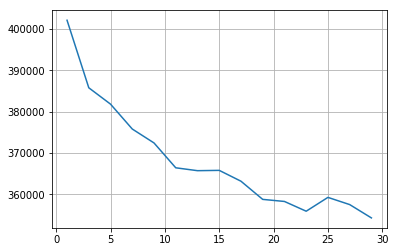

In [98]:
plt.figure()
plt.plot(ks,es)
plt.grid(True)
plt.show()

In [50]:
clusters = KMeans.train(featureed, 11, maxIterations=10, initializationMode="random", seed=10)


In [51]:
clusters.clusterCenters

[array([0.00317965, 0.00079491, 0.00039746, ..., 0.        , 0.        ,
        0.        ]),
 array([0.02581864, 0.01952141, 0.01322418, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00795357, 0.00741617, 0.00397678, ..., 0.        , 0.00010748,
        0.        ]),
 array([0.0061792 , 0.01390319, 0.01390319, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00385027, 0.00256684, 0.00513369, ..., 0.        , 0.        ,
        0.0002139 ]),
 array([0.00628931, 0.        , 0.00033102, ..., 0.00033102, 0.        ,
        0.        ]),
 array([0.01623932, 0.01111111, 0.02136752, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00457481, 0.00107643, 0.00215285, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00153296, 0.0035769 , 0.00102197, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00778456, 0.00904692, 0.01136125, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.00049875, 0.00049875, ..., 0

In [52]:
clusters.computeCost(featureed)

366406.4706358579

In [53]:
predictions = clusters.predict(featureed)
predictions.map(lambda x:(x,1)).reduceByKey(lambda x,y:x+y).collect()

[(0, 2499),
 (2, 9331),
 (4, 4579),
 (6, 2364),
 (8, 3901),
 (10, 1974),
 (1, 1576),
 (3, 1940),
 (9, 4938),
 (5, 2994),
 (7, 3678)]

In [54]:
predictions=featuredata.map(lambda kv:(clusters.predict(kv[1]),kv[0]))

In [58]:
for e in predictions.groupByKey().collect():
    print'\nNew cluster:',clusters.centers[e[0]]
    x=[v for v in e[1]]
    d={}
    for i in x :
        if dic2[i] in d:
            d[dic2[i]] += 1
           
        else:
            d[dic2[i]] = 1
    print d



New cluster: [0.00317965 0.00079491 0.00039746 ... 0.         0.         0.        ]
{u'irish': 132, u'mexican': 192, u'chinese': 40, u'filipino': 21, u'vietnamese': 5, u'moroccan': 16, u'spanish': 20, u'japanese': 42, u'french': 293, u'greek': 56, u'indian': 68, u'cajun_creole': 152, u'british': 144, u'brazilian': 5, u'russian': 56, u'jamaican': 21, u'korean': 13, u'southern_us': 693, u'thai': 8, u'italian': 522}

New cluster: [0.00795357 0.00741617 0.00397678 ... 0.         0.00010748 0.        ]
{u'irish': 162, u'mexican': 1894, u'filipino': 102, u'chinese': 449, u'vietnamese': 267, u'moroccan': 97, u'spanish': 155, u'japanese': 358, u'british': 237, u'greek': 194, u'indian': 460, u'cajun_creole': 342, u'french': 706, u'brazilian': 188, u'russian': 90, u'jamaican': 93, u'thai': 635, u'southern_us': 1154, u'korean': 133, u'italian': 1615}

New cluster: [0.00385027 0.00256684 0.00513369 ... 0.         0.         0.0002139 ]
{u'irish': 99, u'mexican': 788, u'filipino': 88, u'chinese':

### train a multiclass logistic regression to predict cuisine from ingredients

In [9]:
trainingData, testData = labeled.randomSplit( [0.7, 0.3] , seed = 11L)

In [10]:

import sys
from pyspark.ml.classification import LogisticRegression
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel
from pyspark.mllib.util import MLUtils
import re


In [11]:
model = LogisticRegressionWithLBFGS.train(trainingData, iterations=10 ,intercept = True, numClasses=20)
labelsAndPreds = testData.map(lambda p: (p.label, model.predict(p.features)))
trainErr = labelsAndPreds.filter(lambda (v, p): v != p).count() / float(testData.count())
print("Training Error = " + str(trainErr))

Training Error = 0.273107094134


In [12]:
prediction = model.predict(testData.map(lambda x:x.features))
p = prediction.zip(testData.map(lambda x:x.label))
p.collect()

[(2, 17.0),
 (1, 14.0),
 (19, 19.0),
 (2, 13.0),
 (17, 9.0),
 (19, 19.0),
 (2, 2.0),
 (1, 1.0),
 (19, 19.0),
 (19, 19.0),
 (1, 11.0),
 (11, 11.0),
 (1, 1.0),
 (1, 1.0),
 (11, 11.0),
 (19, 19.0),
 (11, 11.0),
 (19, 19.0),
 (6, 6.0),
 (14, 14.0),
 (16, 17.0),
 (19, 19.0),
 (4, 4.0),
 (1, 1.0),
 (5, 5.0),
 (11, 11.0),
 (1, 1.0),
 (5, 19.0),
 (5, 19.0),
 (11, 19.0),
 (16, 16.0),
 (19, 17.0),
 (18, 1.0),
 (1, 1.0),
 (2, 2.0),
 (5, 0.0),
 (19, 19.0),
 (1, 1.0),
 (2, 2.0),
 (7, 7.0),
 (5, 14.0),
 (5, 5.0),
 (9, 9.0),
 (17, 17.0),
 (5, 19.0),
 (14, 16.0),
 (19, 19.0),
 (12, 12.0),
 (1, 1.0),
 (15, 17.0),
 (5, 19.0),
 (1, 1.0),
 (1, 5.0),
 (15, 2.0),
 (2, 2.0),
 (5, 14.0),
 (11, 11.0),
 (19, 19.0),
 (19, 19.0),
 (1, 1.0),
 (1, 1.0),
 (15, 15.0),
 (1, 1.0),
 (11, 11.0),
 (17, 17.0),
 (8, 5.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (14, 14.0),
 (19, 19.0),
 (11, 11.0),
 (1, 1.0),
 (6, 11.0),
 (1, 1.0),
 (11, 11.0),
 (6, 6.0),
 (14, 19.0),
 (1, 11.0),
 (1, 1.0),
 (2, 2.0),
 (1, 1.0),
 (7, 7.0),
 (15, 

In [13]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [14]:
predictionAndLabels = testData.map(lambda lp: (float(model.predict(lp.features)), lp.label))
matrix = MulticlassMetrics(predictionAndLabels)
matrix.accuracy
matrix.confusionMatrix()

DenseMatrix(20, 20, [54.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 4.0, ..., 1.0, 2.0, 46.0, 5.0, 49.0, 8.0, 5.0, 1917.0], 0)

In [15]:
print("Weighted recall = %s" % matrix.weightedRecall)
print("Weighted precision = %s" % matrix.weightedPrecision)
print("Weighted F(1) Score = %s" % matrix.weightedFMeasure())

Weighted recall = 0.726892905866
Weighted precision = 0.731023160027
Weighted F(1) Score = 0.726424953111


In [16]:
from pyspark.mllib.evaluation import RegressionMetrics
valuesAndPreds = testData.map(lambda p: (float(model.predict(p.features)), p.label))
metrics = RegressionMetrics(valuesAndPreds)

# Squared Error
print("MSE = %s" % metrics.meanSquaredError)
print("RMSE = %s" % metrics.rootMeanSquaredError)

MSE = 23.1041950887
RMSE = 4.80668233698


In [48]:
a=model.weights.values[:127566]
for i in a.reshape(19,6714):
    print max(i)
    print dicc[int(np.argwhere(i == max(i)))]
print max(model.weights.values[127566:])


21.145283413726514
rose hip tea bags
24.025117468474775
passover wine
33.88610487895916
thyme leaves
19.869739111479866
Mexican lager beer
21.48694646798213
blackcurrant syrup
22.790069926671592
papad
22.416378103088753
savory
22.292142020821107
frozen ravioli
23.568529604268168
lean minced lamb
23.05605044749052
canned snails
24.749153280467436
neutral oil
22.811882640265473
jamaican rum
22.2418931582924
anise powder
27.33690083503753
beef boneless meat stew
25.877008845179148
goya sazon
21.878259201099834
red wine vinaigrette
19.651971104972944
galangal
23.718634616842767
Accent Seasoning
22.515710085459773
garbonzo bean
8.011457987923832


In [ ]:
labels = testData.map(lambda lp: lp.label).distinct().collect()
for label in sorted(labels):
    print("Class %s precision = %s" % (label, matrix.precision(label)))
    print("Class %s recall = %s" % (label, matrix.recall(label)))
    print("Class %s F1 Measure = %s" % (label, matrix.fMeasure(label, beta=1.0)))

In [56]:
### Alternative way

In [13]:
lines = labeled.map(lambda p: MLUtils._convert_labeled_point_to_libsvm(p))
hasattr(lines, "toDF")
row = Row("val") # Or some other column name
rowdata=lines.map(row).toDF()
rowdata.show()

+--------------------+
|                 val|
+--------------------+
|16.0 1:1.0 2:1.0 ...|
|11.0 10:1.0 11:1....|
|3.0 5:1.0 12:1.0 ...|
|17.0 12:1.0 20:1....|
|17.0 12:1.0 19:1....|
|9.0 10:1.0 12:1.0...|
|14.0 4:1.0 5:1.0 ...|
|19.0 16:1.0 48:1....|
|1.0 6:1.0 12:1.0 ...|
|19.0 4:1.0 59:1.0...|
|19.0 2:1.0 4:1.0 ...|
|2.0 4:1.0 30:1.0 ...|
|19.0 59:1.0 79:1....|
|1.0 4:1.0 12:1.0 ...|
|19.0 12:1.0 14:1....|
|17.0 13:1.0 36:1....|
|7.0 131:1.0 132:1...|
|19.0 21:1.0 135:1...|
|10.0 48:1.0 113:1...|
|13.0 12:1.0 20:1....|
+--------------------+
only showing top 20 rows



In [ ]:
#spark = SparkSession(sc)
#df = featuredata.toDF()
#mlr = LogisticRegression(maxIter=10,regParam=0.3,elasticNetParam=0.8,family='multinomial')#
#mlr.fit(df)

#max[i] (for i in mrlModel.coefficientMatrix.toArray())
#mrlModel.transform(test).show()

#from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#prediction=mrlModel.transform(test)
#evaluator=MulticlassClassificationEvaluator(metricName='accuracy')
#accuracy=evaluator.evaluate(prediction)
#accuracy

In [ ]:
sc.close()